<a href="https://colab.research.google.com/github/namratha1845/DBMS-CS2201/blob/main/boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== AdaBoost Evaluation ===
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC AUC: 0.9944317065181789

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Full Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Cross-validation scores: [0.98245614 0.96491228 0.99122807 0.96491228 0.98230088]
Mean CV Accuracy: 0.9771619313771154

Single Tree Accuracy: 0.8947368421052632
AdaBoost Accuracy: 0.9736842105263158


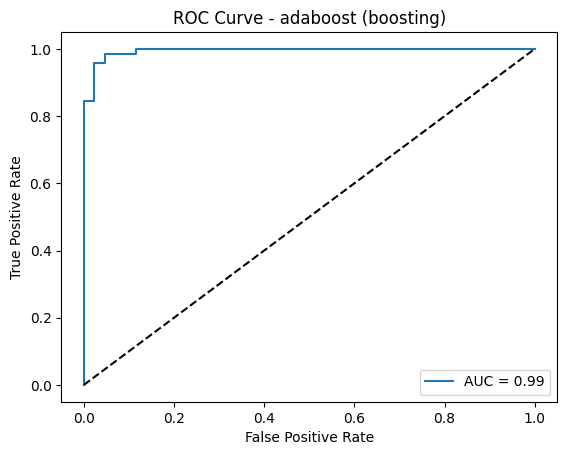

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

base_estimator = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


print("=== AdaBoost Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nFull Classification Report:\n")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("\nCross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


single_model = DecisionTreeClassifier(max_depth=1, random_state=42)
single_model.fit(X_train, y_train)

single_pred = single_model.predict(X_test)

print("\nSingle Tree Accuracy:", accuracy_score(y_test, single_pred))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - adaboost (boosting)')
plt.legend()
plt.show()